<center><h1>EDA</h1></center>

In [26]:
#Carga de librerías para tratar datos y graficar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

In [14]:
#cargamos data sets
df_reviews= pd.read_parquet(r'clean_reviews.parquet.gzip')
df_games = pd.read_parquet(r'clean_games.parquet.gzip').explode('genres')
df_games_expanded = pd.read_parquet(r'clean_games.parquet.gzip').explode('genres')
df_items = pd.read_parquet(r'clean_items.parquet.gzip')

In [13]:
#EDA para games:
df_games.head()
#mantenemos sin expansión de genero para hacer un buen EDA a publisher

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88310,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88310,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88310,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88310,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro


In [40]:
#EDA a publishers
publisher = dict(list(df_games['publisher'].value_counts().sort_values(ascending=False).to_dict().items())) 
#se hace un diccionario con el nombre de las empresas y su numero de items ordenado de forma descendiente
#(se graficó el publisher como lineas y se notó un comportamiento descendente de forma exponencial así que veremos el comportamiento de los primeros 10 publishers)
publisher_counts = df_games['publisher'].value_counts()
top_10_publishers = publisher_counts.head(10)
top_10_publishers = dict(top_10_publishers)
label = list(top_10_publishers.keys()) # se definen las etiquetas
values = list(top_10_publishers.values()) # se definen los valores de las barras

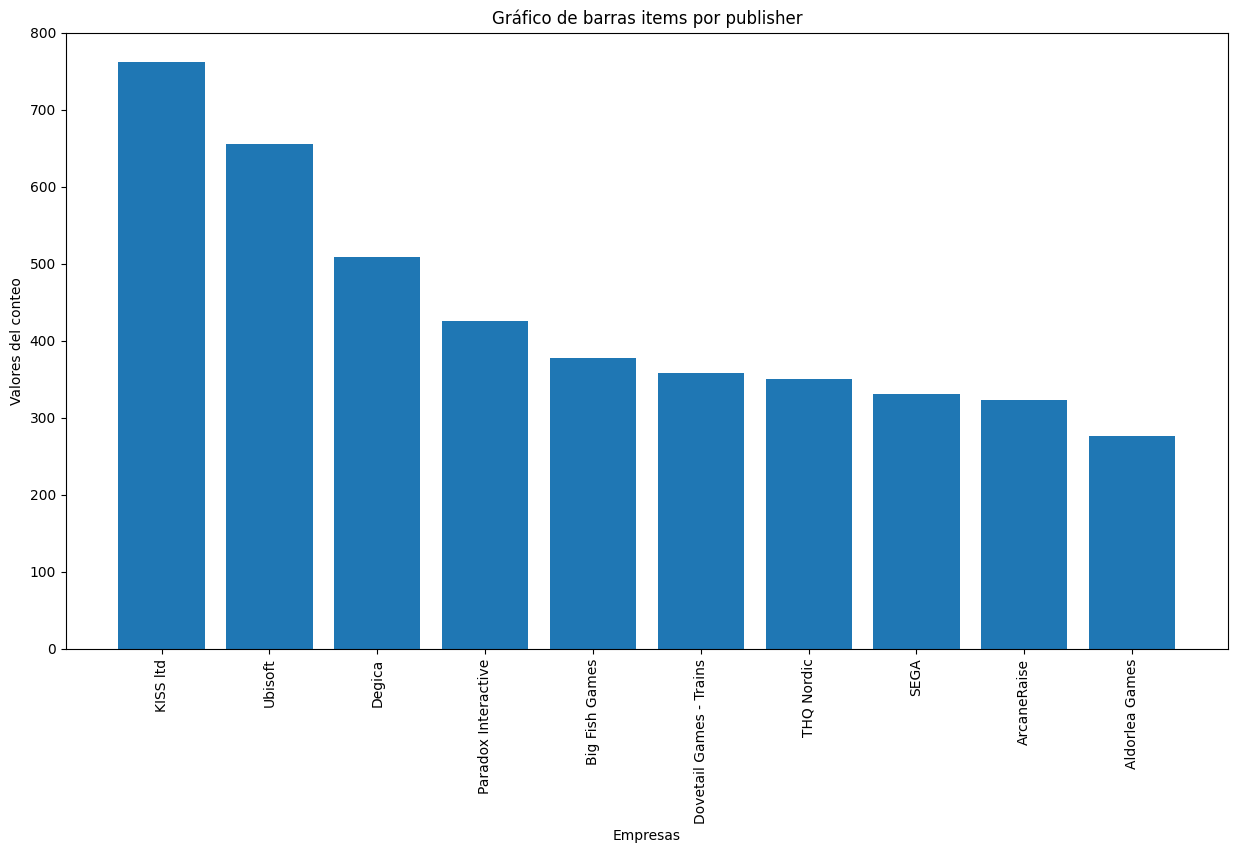

In [52]:
plt.figure(figsize=(15, 8))

plt.bar(label, values)
plt.xlabel('Empresas')
plt.ylabel('Valores del conteo')
plt.title('Gráfico de barras items por publisher')
plt.xticks(rotation=90)  # Rotar etiquetas si son largas
plt.show()
#seguimos viendo como se comporta de forma descendiente, pero son los valores que encabezan la lista antes de irse en picada

In [48]:
#EDA a fechas de posteo
plt.figure(figsize=(15, 8))

C:\Users\Luis Mario Gomez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Luis Mario Gomez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


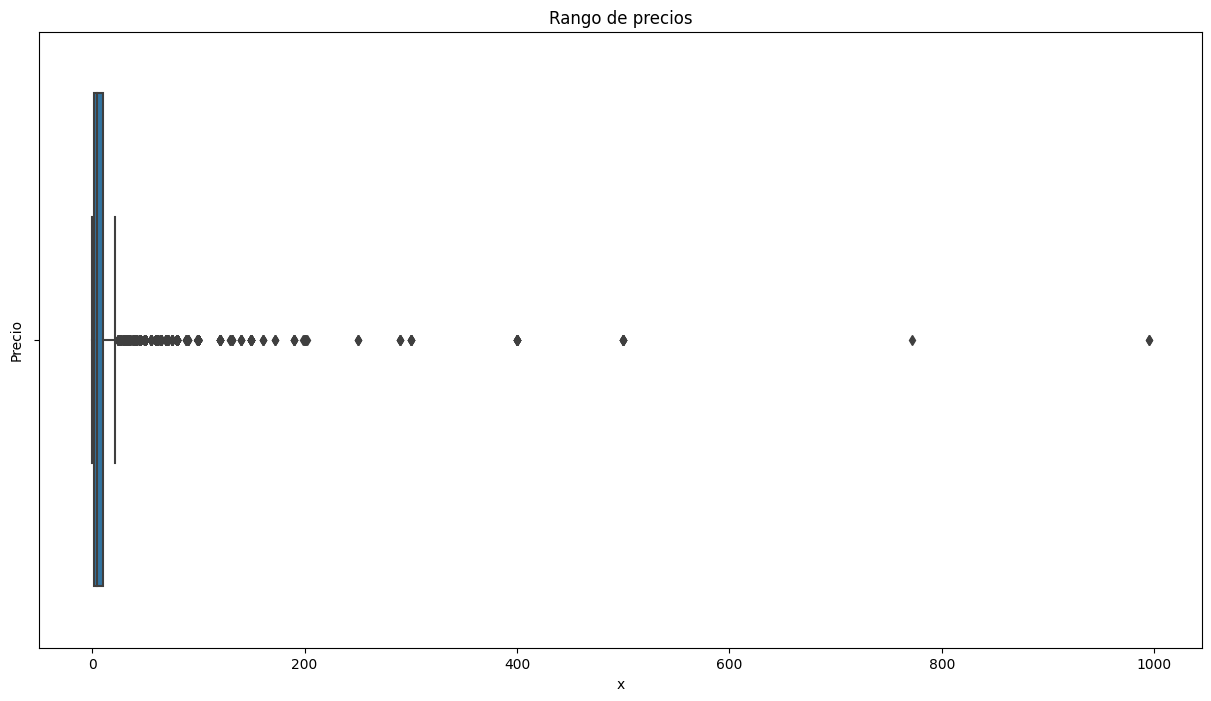

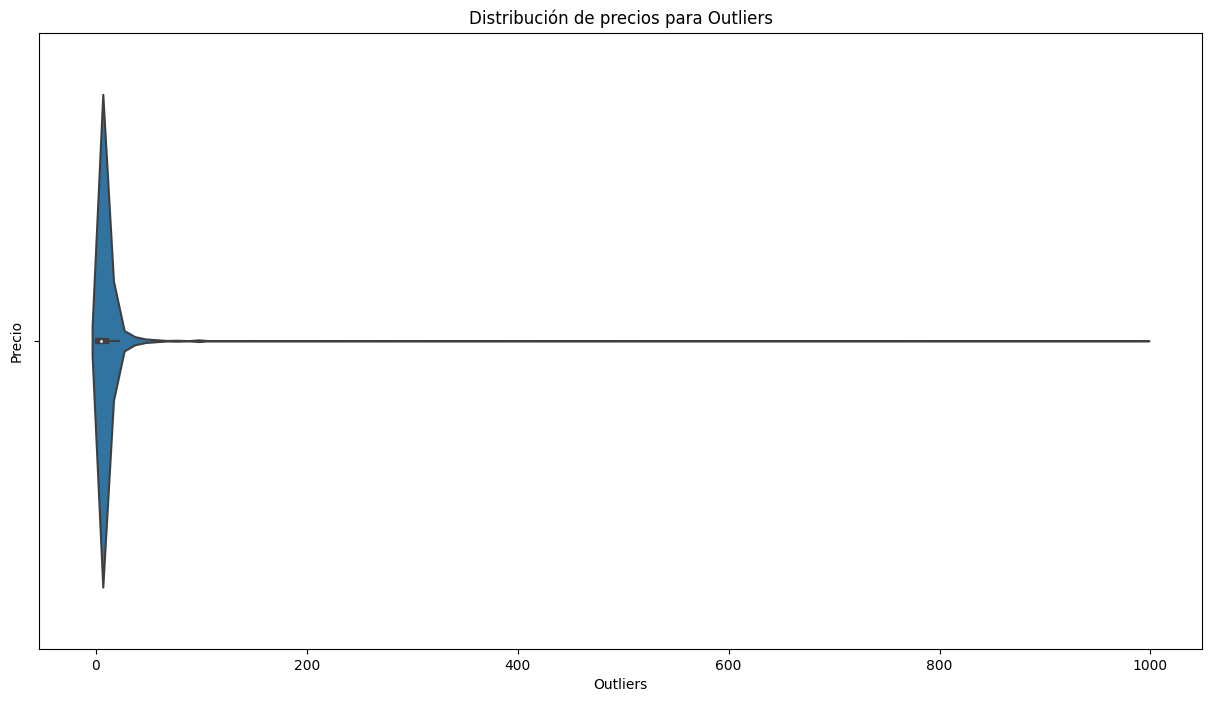

In [58]:
#EDA a los precios
plt.figure(figsize=(15, 8))
sns.boxplot(x='price', data=df_games) # Creamos un boxplot sobre los precios
plt.ylabel('Precio')
plt.xlabel('x')
plt.title('Rango de precios')
plt.show
###
plt.figure(figsize=(15, 8))
sns.violinplot(x='price', data=df_games)
plt.ylabel('Precio')
plt.xlabel('Outliers')
plt.title('Distribución de precios para Outliers')
plt.show()

#con esta información podemos saber que hay valores fuera de lo común en precios bajos.

In [59]:
#EDA REVIEWS
df_reviews.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-11-05,,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-07-15,,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,2011-04-21,,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN,2
3,js41637,http://steamcommunity.com/id/js41637,,2014-06-24,,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN,2
4,js41637,http://steamcommunity.com/id/js41637,,2013-09-08,,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN,2


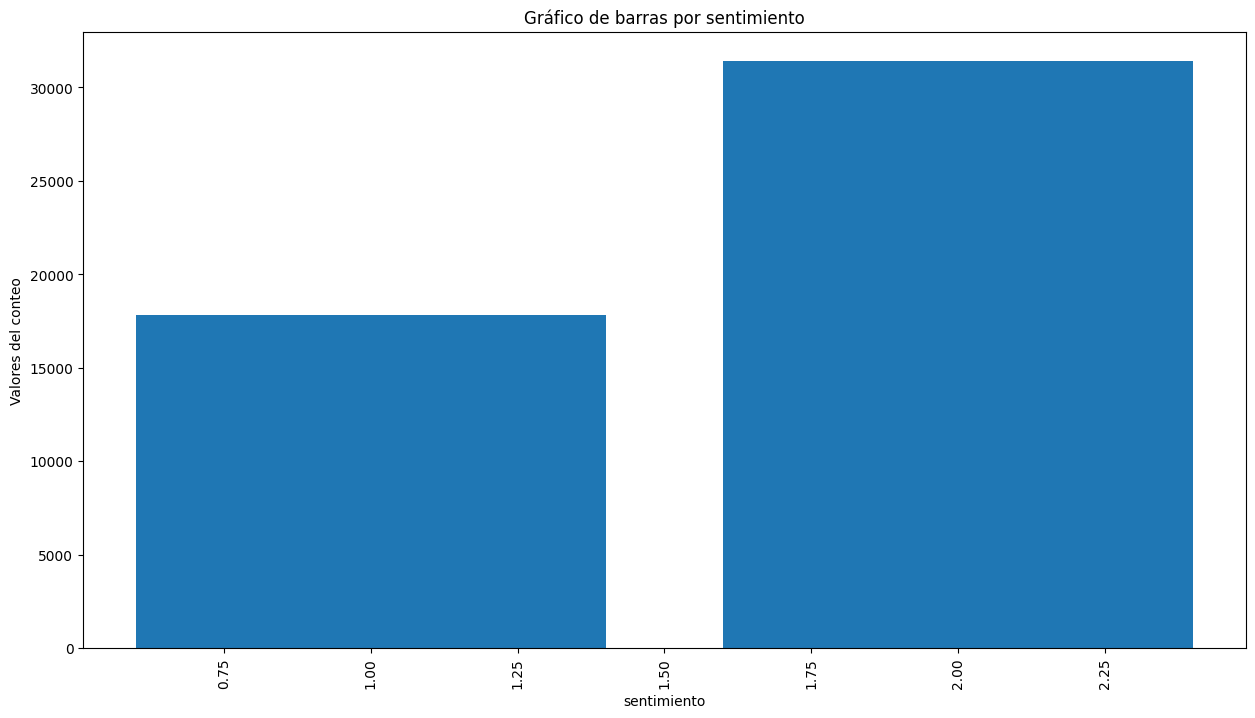

In [64]:
plt.figure(figsize=(15, 8))
sentimiento = dict(list(df_reviews['sentiment_analysis'].value_counts().sort_values(ascending=False).to_dict().items())) 
sent = list(sentimiento.keys())
val = list(sentimiento.values())
plt.bar(sent, val)
plt.xlabel('sentimiento')
plt.ylabel('Valores del conteo')
plt.title('Gráfico de barras por sentimiento')
plt.xticks(rotation=90)  # Rotar etiquetas si son largas
plt.show()
#podemmos observar que no hay valores neutros, eso quiere decir que nuestro modelo de NLP no detecta sentimientos neutros
#habría que analizar si es por nuestro modelo de NLP o porque no existen